# **Predicting Hotel Booking Cancellations with Machine Learning**

## Objectives
- Build and evaluate a predictive model that identifies the likelihood of hotel booking cancellations
- Determine the most important factors influencing cancellations

## Inputs
- Processed and balanced dataset hotel_bookings_sample.csv
- Supporting Python libraries

## Outputs
- Trained Random Forest model for cancellation prediction
- Performance metrics (accuracy, precision, recall, F1-score, ROC-AUC)
- Feature importance rankings
- Visualizations of model performance and key findings
- Saved model file for future use cancelscope_model.pkl

## Additional Comments
- The dataset was balanced to ensure fair evaluation of cancellation and non-cancellation predictions.
- Threshold tuning was performed to prioritize high recall, supporting proactive cancellation management.
- Future improvements could include testing additional machine learning algorithms and integrating real-time data for ongoing model updates.



---

# Change working directory

The notebooks are stored in a subfolder, so to ensure correct file access when running them, the working directory needs to be changed from the notebook’s current folder to its parent folder. This is managed by accessing the current directory using os.getcwd() and then updating it as needed.

In [1]:
import os
current_dir = os.getcwd()
current_dir

'd:\\vscode-projects\\CancelScope-Hotel-Booking-Analysis\\jupyter_notebooks'

To set the parent folder as the working directory, os.path.dirname() is used to obtain the parent directory and os, and chdir() is used to update the current working directory accordingly.

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'd:\\vscode-projects\\CancelScope-Hotel-Booking-Analysis'

# Import libraries

In [4]:
import pandas as pd # For data manipulation
import seaborn as sns # For data visualization
import matplotlib.pyplot as plt # For plotting
from sklearn.model_selection import train_test_split # For splitting the dataset
from sklearn.ensemble import RandomForestClassifier # For Random Forest model
from sklearn.metrics import classification_report, confusion_matrix # For evaluation metrics
from sklearn.metrics import roc_auc_score,precision_score, recall_score # For evaluation metrics
from sklearn.metrics import f1_score, precision_recall_curve # For evaluation metrics
from sklearn.model_selection import cross_val_score # For cross-validation
import joblib # For saving and loading models

# Load data

In [5]:
csv_path = os.path.join(current_dir, "data", "clean", "hotel_bookings_sample.csv") # Path to the CSV file

# Preliminary checks

Check the shape of the data frame

In [6]:
# Load the CSV file into a DataFrame
df = pd.read_csv(csv_path)
df.shape

(10000, 28)

Confirm balans of target label

In [7]:
df['is_canceled'].value_counts()

is_canceled
True     5000
False    5000
Name: count, dtype: int64

Check for duplicates

In [8]:
df.duplicated().sum()

0

Missing values count

In [9]:
df.isnull().sum()


hotel                            0
lead_time                        0
arrival_date_year                0
arrival_date_month               0
weekend_nights                   0
week_nights                      0
adults                           0
children                         0
babies                           0
is_international                 0
days_waiting                     0
is_repeated_guest                0
is_family                        0
is_canceled                      0
market_segment_complementary     0
market_segment_corporate         0
market_segment_direct            0
market_segment_groups            0
market_segment_offline_ta_to     0
market_segment_online_ta         0
distribution_channel_direct      0
distribution_channel_gds         0
distribution_channel_ta_to       0
deposit_type_non_refund          0
deposit_type_refundable          0
customer_type_group              0
customer_type_transient          0
customer_type_transient_party    0
dtype: int64

# Split features/target, train/test

I split the dataset into features (X) and target (y) to separate the inputs from the variable I want to predict—whether a booking is canceled. I then divide the data into training and test sets, reserving 20% for testing, to ensure that model evaluation is performed on unseen data, providing a realistic measure of performance. I stratify by the target to maintain the same proportion of canceled and non-canceled bookings in both sets, which is important for handling class imbalance. Finally, I save the test sets to CSV files to allow reproducible evaluation and further analysis without needing to recompute the split.

In [10]:
# Features and target
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (8000, 27)
Test set shape: (2000, 27)


# Train Random Forest

Now, train a Random Forest classifier to predict booking cancellations using the training data, then makes predictions and calculates probabilities on the test set. It evaluates model performance with a classification report and ROC-AUC score, providing metrics such as precision, recall, F1-score, and the model’s ability to distinguish canceled from non-canceled bookings. Finally, it calculates and visualizes feature importances to identify which input variables contribute most to the model’s predictions.

I chose Random Forest for this hotel booking cancellation project because it handles the mix of numerical and categorical features effectively, is robust to class imbalance (especially after balancing the dataset), and can capture complex relationships between guest behavior, booking details, and cancellations. It also provides feature importance, helping identify which factors most influence cancellations, which is valuable for operational and marketing insights. For future improvements, I could test other methodologies such as Gradient Boosting (e.g., XGBoost, LightGBM) for potentially higher accuracy, Logistic Regression for interpretability, or Neural Networks for capturing even more complex patterns in the data. Each method could be compared using metrics like ROC-AUC, F1-score, and precision/recall to optimize predictive performance.

              precision    recall  f1-score   support

       False       0.69      0.67      0.68      1000
        True       0.68      0.70      0.69      1000

    accuracy                           0.69      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.69      0.69      0.69      2000

ROC-AUC: 0.760529


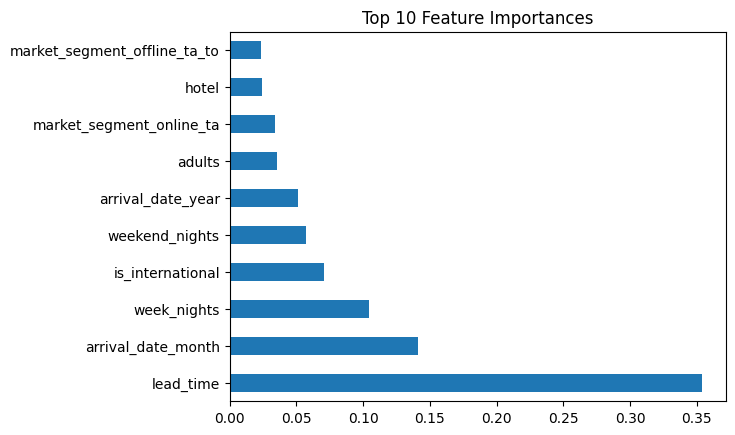

In [11]:
# Train Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances.head(10).plot(kind='barh', title='Top 10 Feature Importances')
plt.show()

The classification metrics show that the model performs fairly well in predicting cancellations and non-cancellations. Precision (~0.69) indicates that about 69% of the predicted labels for each class are correct, while recall (~0.67–0.70) shows that the model correctly identifies roughly 67–70% of actual canceled and non-canceled bookings. The F1-score (~0.68–0.69) balances precision and recall, and overall accuracy is 69%. Since the dataset is balanced, the macro and weighted averages are the same. The ROC-AUC of 0.76 indicates the model has a reasonably good ability to distinguish between canceled and non-canceled bookings across all classification thresholds.

# Evaluate model

I want to evaluate how different probability thresholds affect the model’s classification performance. Instead of using the default threshold of 0.5 I calculate predicted labels at multiple thresholds and measure precision, recall, and F1-score for each. This allows me to understand the trade-off between catching more cancellations (high recall) versus making accurate predictions (high precision) and helps choose an optimal threshold that balances business prioritiessuch as minimizing missed cancellations or avoiding false alerts. The optional plot visualizes how precision and recall change as the threshold varies, making the trade-offs easier to interpret.

Threshold | Precision | Recall | F1-score
----------------------------------------
0.1      | 0.57     | 0.99   | 0.72
0.2      | 0.60     | 0.95   | 0.74
0.3      | 0.63     | 0.90   | 0.74
0.4      | 0.66     | 0.81   | 0.73
0.5      | 0.68     | 0.72   | 0.70
0.6      | 0.69     | 0.59   | 0.64
0.7      | 0.72     | 0.45   | 0.55
0.8      | 0.76     | 0.30   | 0.43
0.9      | 0.81     | 0.14   | 0.23


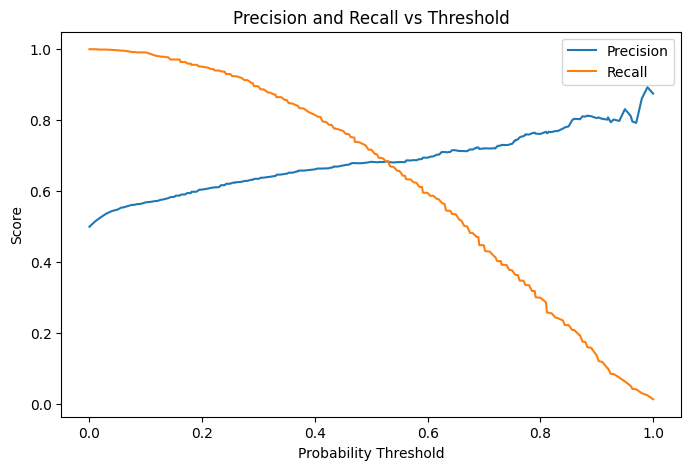

In [12]:
# Predicted probabilities for the positive class (cancellations)
y_proba = rf.predict_proba(X_test)[:, 1]

# Thresholds to evaluate
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

print("Threshold | Precision | Recall | F1-score")
print("----------------------------------------")
for t in thresholds:
    y_pred_t = (y_proba >= t)
    precision = precision_score(y_test, y_pred_t)
    recall = recall_score(y_test, y_pred_t)
    f1 = f1_score(y_test, y_pred_t)
    print(f"{t:.1f}      | {precision:.2f}     | {recall:.2f}   | {f1:.2f}")

# Optional: plot Precision-Recall vs Threshold
precision_vals, recall_vals, thresh_vals = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8,5))
plt.plot(thresh_vals, precision_vals[:-1], label='Precision')
plt.plot(thresh_vals, recall_vals[:-1], label='Recall')
plt.xlabel('Probability Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.show()

The Precision-Recall vs Threshold plot illustrates the trade-off between precision and recall in the Random Forest cancellation model. Lowering the probability threshold increases recall, capturing more actual cancellations but also generating more false positives. Raising the threshold improves precision, making predictions more accurate, but misses more true cancellations. The optimal threshold depends on business priorities: favor recall if catching most cancellations is critical, or favor precision if reducing false positives is more important.
The business goal is to catch as many cancelations as possible (high recall), but also I want to avoid too many false positives. 
That means I need a balanced threshold -low enough to catch most cancellations but not so low to get too many false positives.

I apply a custom threshold of 0.3 to convert the predicted probabilities from the Random Forest into binary cancellation predictions in order to balance recall and precision for the business case. By generating a classification report, I can evaluate performance metrics like precision, recall, F1-score, and ROC-AUC at this chosen threshold, while the confusion matrix provides a clear visual of true positives, false positives, true negatives, and false negatives. This approach helps me assess how well the model identifies cancellations, understand the types of errors it makes, and determine whether the threshold effectively captures most cancellations without producing too many false alarms.

Classification report at threshold 0.3:
              precision    recall  f1-score   support

       False       0.82      0.48      0.61      1000
        True       0.63      0.90      0.74      1000

    accuracy                           0.69      2000
   macro avg       0.73      0.69      0.68      2000
weighted avg       0.73      0.69      0.68      2000

ROC-AUC: 0.760537


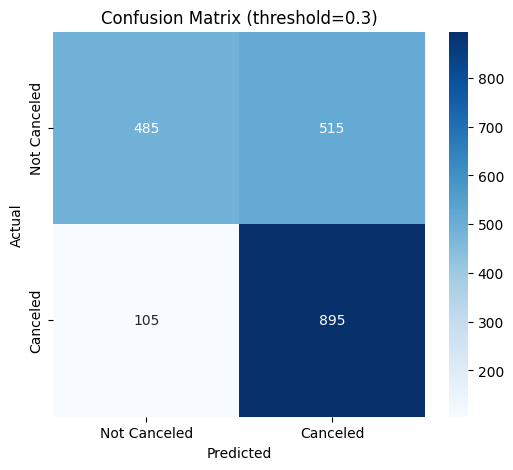

In [13]:
# Apply threshold
threshold = 0.3
y_pred_final = (y_proba >= threshold)

# Classification report
print(f"Classification report at threshold {threshold}:")
print(classification_report(y_test, y_pred_final))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled','Canceled'], yticklabels=['Not Canceled','Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (threshold={threshold})')
plt.show()

At a threshold of 0.3, the model prioritizes recall for cancellations (True), achieving 0.90, meaning it correctly identifies 90% of actual cancellations. Precision for cancellations is lower (0.63), indicating some non-canceled bookings are incorrectly flagged. For non-cancellations (False), precision is high (0.82) but recall is lower (0.48), so the model misses more true non-cancellations. The overall F1-scores reflect this trade-off (0.74 for canceled, 0.61 for non-canceled), with accuracy at 69%. The ROC-AUC of 0.76 shows the model has good overall discriminative ability, effectively distinguishing canceled from non-canceled bookings across all thresholds.
This confirms that threshold 0.3 favors catching most cancellations (high recall) while accepting more false positives, aligning with business priorities to proactively manage likely cancellations.
Using threshold 0.3 prioritizes catching cancellations, which is key for actions like sending reminders, offering incentives, or reallocating resources.
Some false positives are inevitable, but this is an acceptable trade-off when the goal is high recall.

I want to explore how changing the probability threshold affects model performance. By calculating predictions at a higher threshold (0.4 instead of 0.3) and evaluating metrics like precision, recall, F1-score, and ROC-AUC, you can see the trade-off between catching cancellations (recall) and reducing false positives (precision). Essentially, it’s a way to fine-tune the model for the most practical and actionable predictions.

In [14]:
# Predicted probabilities for the positive class
y_proba = rf.predict_proba(X_test)[:, 1]

# Set new threshold
threshold = 0.4
y_pred_threshold = (y_proba >= threshold)

# Evaluate metrics at threshold 0.4
print(f"Classification report at threshold {threshold}:")
print(classification_report(y_test, y_pred_threshold))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

Classification report at threshold 0.4:
              precision    recall  f1-score   support

       False       0.76      0.58      0.66      1000
        True       0.66      0.81      0.73      1000

    accuracy                           0.70      2000
   macro avg       0.71      0.70      0.69      2000
weighted avg       0.71      0.70      0.69      2000

ROC-AUC: 0.760529


I can conclude that: higher threshold leads to fewer false positives, but more missed cancellations. Lower threshold catches more cancellations, but more false alarms.
In the business requirement, cost of missing a cancellation is high (lost revenue, last-minute vacancies) and sending offers/incentives to prevent cancellations is cheap and automated.
The business goal is to proactively reach out (via offers or incentives) to customers likely to cancel, and for that reason I will consider a lower threshold as 0,3 valid
This approach maximizes the number of potential cancellations cought, even if it means some customers who wouldn’t have canceled receive offers. If the cost of sending offers is low compared to the potential benefit of saving bookings, this is a sound strategy. A further/future analysis would develop this idea and will analyse potential costs of cancelations, offers, automated systems etc.

I train this Random Forest model with class_weight='balanced' and tuned hyperparameters to handle the imbalanced dataset and improve predictive performance. The class weighting ensures that cancellations (the minority class) are given more importance during training, helping the model learn patterns for both canceled and non-canceled bookings effectively. Other parameters like n_estimators=500, max_depth=20, and min_samples_split control tree complexity and reduce overfitting, while random_state=42 ensures reproducibility and n_jobs=-1 speeds up training by using all CPU cores. Overall, this approach creates a robust, well-tuned model optimized for accurately predicting cancellations.

In [15]:
# Train Random Forest with class weights to handle imbalance
rf_weighted = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    n_estimators=500,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=20
)
rf_weighted.fit(X_train, y_train) # Train the model

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=42)

The trained Random Forest model is a robust ensemble of 500 decision trees with a maximum depth of 20, minimum 10 samples required to split a node, and at least 2 samples per leaf, which helps control overfitting while capturing complex patterns in the data. Using class_weight='balanced' ensures that cancellations (the minority class) are given more importance, improving the model’s ability to detect them. max_features='sqrt' limits the number of features considered at each split, adding randomness to reduce correlation between trees, while random_state=42 guarantees reproducible results and n_jobs=-1 accelerates training by using all CPU cores. Overall, these settings produce a well-tuned, high-performing model capable of accurately predicting cancellations and highlighting important features influencing the outcome.

# Check feature importance

To understand which features have the most influence on the Random Forest model’s predictions i extract the feature_importances_ attribute to quantify how much each input variable contributes to reducing prediction error

                         feature  importance
1                      lead_time    0.253482
9               is_international    0.147997
3             arrival_date_month    0.084215
18      market_segment_online_ta    0.076519
5                    week_nights    0.069013
2              arrival_date_year    0.066144
17  market_segment_offline_ta_to    0.043918
4                 weekend_nights    0.039657
6                         adults    0.026307
0                          hotel    0.025388


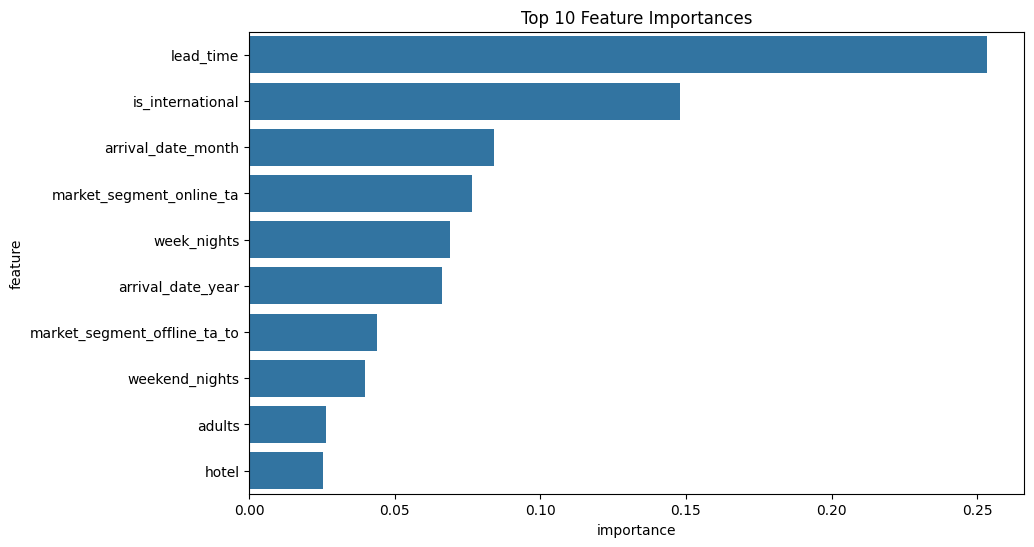

In [16]:
# Create a DataFrame of feature importances
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_weighted.feature_importances_
})

# Sort by importance descending
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Display top 10 features
print(feature_importances.head(10))

# Plot top 10 features
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

- lead_time (0.25)	Most predictive feature. Bookings made far in advance are much more likely to cancel — customers have more time to change plans	
- is_international (0.15)	International guests have higher cancellation risk (travel restrictions, visa issues, flight costs)	
- arrival_date_month (0.08)	Seasonality plays a role — some months (summer, holidays) may have higher cancellation or rescheduling rates	
- market_segment_online_ta (0.08)	Bookings through online travel agencies (OTAs) tend to have more flexible cancellation policies — higher risk	
- week_nights (0.07)	Longer weekday stays might correlate with business travel, which can fluctuate or get canceled	
- arrival_date_year (0.07)	Some years might reflect macro patterns (like travel restrictions or demand recovery)	
- market_segment_offline_ta_to (0.04)	Offline travel agent or tour operator bookings tend to be more stable — lower risk	
- weekend_nights (0.04)	Shorter weekend stays often have less cancellation risk	
- adults (0.03)	Family/group bookings are usually more stable than solo travelers	
- hotel (0.03)	The type of hotel (city vs resort) still influences cancellation likelihood — resorts often see higher rates due to vacation planning uncertainty

# Cross validation

Finally, assess the model’s performance and stability on unseen data without touching the test set. By performing 5-fold cross-validation, the training data is split into five subsets, and the model is trained and evaluated five times, each time using a different fold as the validation set. Using scoring='roc_auc' measures how well the model distinguishes between canceled and non-canceled bookings. Printing the mean and standard deviation of the ROC-AUC scores shows both the average predictive ability and the consistency of the model across folds. This approach helps detect overfitting, ensures the model generalizes well, and provides a more reliable estimate of performance than a single train-test split.

In [17]:
# Evaluate the model using 5-fold cross-validation on the training data
cv_scores = cross_val_score(
    rf_weighted, X_train, y_train,
    cv=5, scoring='roc_auc', n_jobs=-1
)

print("Cross-validation ROC-AUC scores:", cv_scores)
print("Mean ROC-AUC:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation ROC-AUC scores: [0.80691172 0.79811094 0.78277188 0.76884375 0.77811875]
Mean ROC-AUC: 0.78695140625
Standard deviation: 0.013757330595620178


The model’s cross-validated ROC-AUC averages 0.79 with a low standard deviation, demonstrating both strong discriminatory power and stability across different data subsets. This suggests the model is reliable for predicting booking cancellations and is unlikely to be overfitting to any particular fold of the data.

# Save the model

Save the trained Random Forest model to a file so that it can be reused later without retraining. By storing it as a .pkl file using joblib.dump, the model’s learned patterns are preserved as well as  feature importances and all parameters. This allows to load the model later for predictions, evaluation or deployment

In [18]:
# Define the path to save the model
model_path = os.path.join(current_dir, "model", "cancelscope_model.pkl")

# Save the trained model (rf_weighted) to the specified file
joblib.dump(rf_weighted, model_path)
print(f"Model saved to {model_path}")

Model saved to d:\vscode-projects\CancelScope-Hotel-Booking-Analysis\model\cancelscope_model.pkl


---

NOTE

* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---